In [1]:
import numpy as np
import pandas as pd

from keras import utils
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Reshape, Conv2D, AveragePooling2D, Flatten

Using TensorFlow backend.


In [15]:
batch_size = 256
num_classes = 10
epochs = 10

## Load the data

In [2]:
train = pd.read_csv('train.csv')
labels = (train.iloc[:, 0].values).astype('int32')

X_train = (train.iloc[:, 1:].values).astype('float32')
X_test = (pd.read_csv('test.csv').values).astype('float32')

## Explore the data

In [3]:
X_train.shape

(42000, 784)

In [4]:
X_test.shape

(28000, 784)

In [5]:
y_train = utils.to_categorical(labels, num_classes=num_classes)

In [6]:
scale = np.max(X_train)
X_train /= scale
X_test /= scale

mean = np.std(X_train)
X_train -= mean
X_test -= mean

In [7]:
split_ratio = 0.1
split_index = int(split_ratio * X_train.shape[0])
x_val = X_train[:split_index]
partial_x_train = X_train[split_index:]

y_val = y_train[:split_index]
partial_y_train = y_train[split_index:]

## Building the network

In [8]:
kaynet = Sequential()

kaynet.add(Reshape(target_shape=(1, 28, 28), input_shape=(784,)))
kaynet.add(Conv2D(kernel_size=(3, 3), filters=32, padding="same", data_format="channels_first", kernel_initializer="uniform", use_bias=False))
kaynet.add(AveragePooling2D(pool_size=(2, 2), data_format="channels_first"))
kaynet.add(Conv2D(kernel_size=(3, 3), filters=32, padding="same", data_format="channels_first", kernel_initializer="uniform", use_bias=False))
kaynet.add(AveragePooling2D(pool_size=(2, 2), data_format="channels_first"))
kaynet.add(Flatten())
kaynet.add(Dense(units=1000, activation='relu'))
kaynet.add(Dense(units=100, activation='relu'))
kaynet.add(Dense(units=10, activation='sigmoid'))

In [9]:
kaynet.compile(optimizer=RMSprop(lr=0.001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [12]:
history = kaynet.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_val, y_val))

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 36s 959us/step - loss: 0.1482 - acc: 0.9543 - val_loss: 0.1597 - val_acc: 0.9507
Epoch 2/10
37800/37800 [==============================] - 43s 1ms/step - loss: 0.0999 - acc: 0.9683 - val_loss: 0.0900 - val_acc: 0.9764
Epoch 3/10
37800/37800 [==============================] - 36s 959us/step - loss: 0.0754 - acc: 0.9766 - val_loss: 0.0892 - val_acc: 0.9733
Epoch 4/10
37800/37800 [==============================] - 38s 1ms/step - loss: 0.0585 - acc: 0.9813 - val_loss: 0.0837 - val_acc: 0.9764
Epoch 5/10
37800/37800 [==============================] - 45s 1ms/step - loss: 0.0462 - acc: 0.9855 - val_loss: 0.1189 - val_acc: 0.9671
Epoch 6/10
37800/37800 [==============================] - 59s 2ms/step - loss: 0.0376 - acc: 0.9872 - val_loss: 0.0848 - val_acc: 0.9783
Epoch 7/10
37800/37800 [==============================] - 48s 1ms/step - loss: 0.0303 - acc: 0.9898 - val_loss: 0.0798 - val_

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

## Plotting

### Plotting the training and validation loss

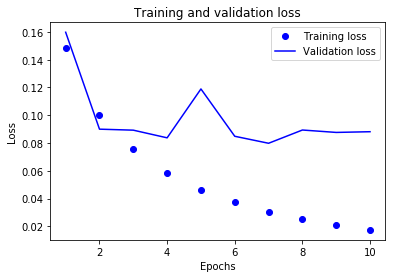

In [16]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

num_epochs = range(1, epochs + 1)

plt.plot(num_epochs, loss_values, 'bo', label='Training loss')
plt.plot(num_epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Plotting the training and validation accuracy

In [ ]:
plt.clf()

acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Generating test predictions

In [19]:
preds = kaynet.predict_classes(X_test)

def write_preds(preds, fname):
    pd.DataFrame({"ImageId": list(range(1,len(preds)+1)), "Label": preds}).to_csv(fname, index=False, header=True)

write_preds(preds, "kay-digit-recognizer.csv")